<a href="https://colab.research.google.com/github/sergkurilenko/databases_hw2/blob/main/%D0%9A%D1%83%D1%80%D0%B8%D0%BB%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A1_%D0%9C_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Куриленко С.М. ДЗ №2 Основные операторы PostgreSQL (vo_HW)

**Создание таблиц**



```
CREATE TABLE customer (
    customer_id INT PRIMARY KEY,
    first_name VARCHAR(50) NOT NULL,
    last_name VARCHAR(50) NOT NULL,
    gender CHAR(6),
    DOB DATE, -- Дата рождения
    job_title VARCHAR(100),
    job_industry_category VARCHAR(100),
    wealth_segment VARCHAR(50),
    deceased_indicator CHAR(1) DEFAULT 'N', -- Y или N
    owns_car CHAR(3),
    address VARCHAR(255),
    postcode VARCHAR(20),
    state VARCHAR(50),
    country VARCHAR(50),
    property_valuation INT
);
```



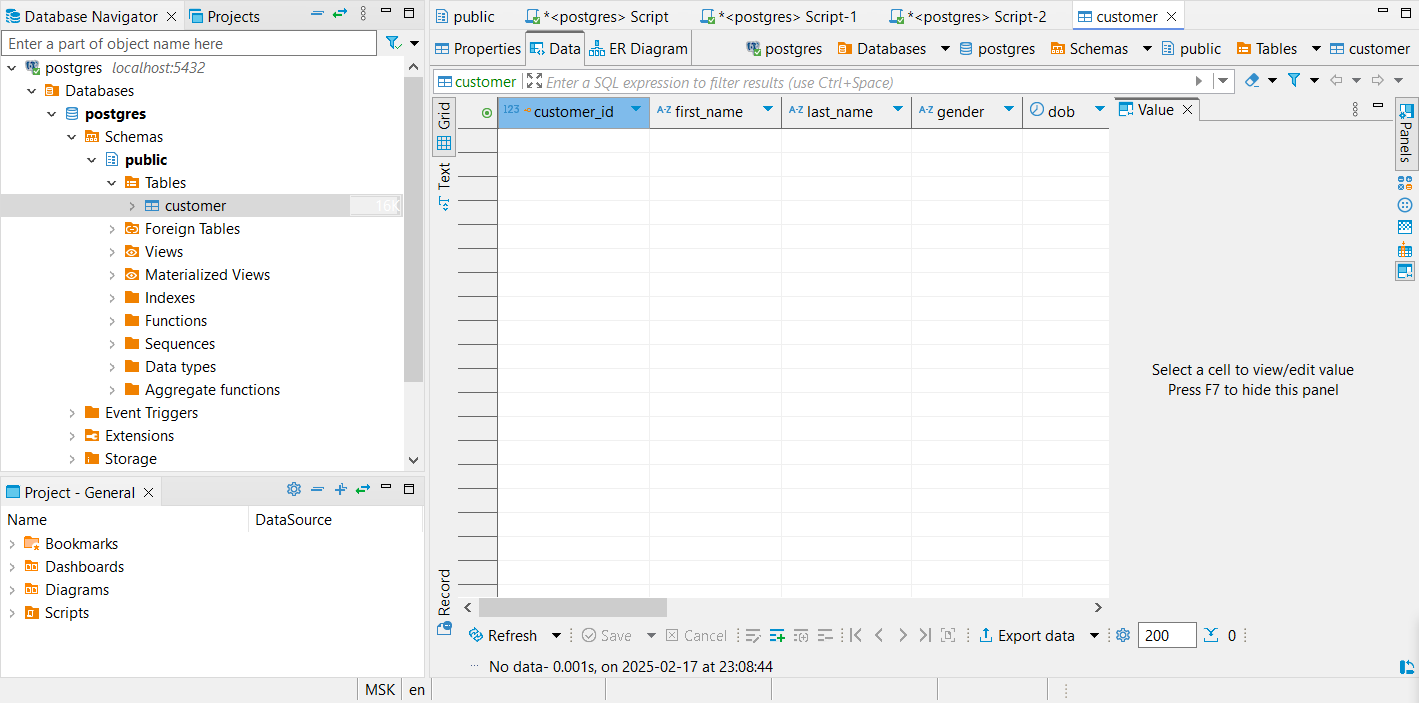



```
CREATE TABLE transaction (
    transaction_id INT PRIMARY KEY,
    product_id INT NOT NULL,
    customer_id INT NOT NULL,
    transaction_date DATE NOT NULL,
    online_order BOOLEAN,
    order_status VARCHAR(50), -- Например, "Completed", "Cancelled"
    brand VARCHAR(100),
    product_line VARCHAR(100),
    product_class VARCHAR(50),
    product_size VARCHAR(50),
    list_price DECIMAL(10, 2), -- Цена с двумя знаками после запятой
    standard_cost DECIMAL(10, 2), -- Стандартная стоимость с двумя знаками после запятой
    CONSTRAINT fk_customer
        FOREIGN KEY (customer_id)
        REFERENCES customer(customer_id)
        ON DELETE CASCADE
);
```



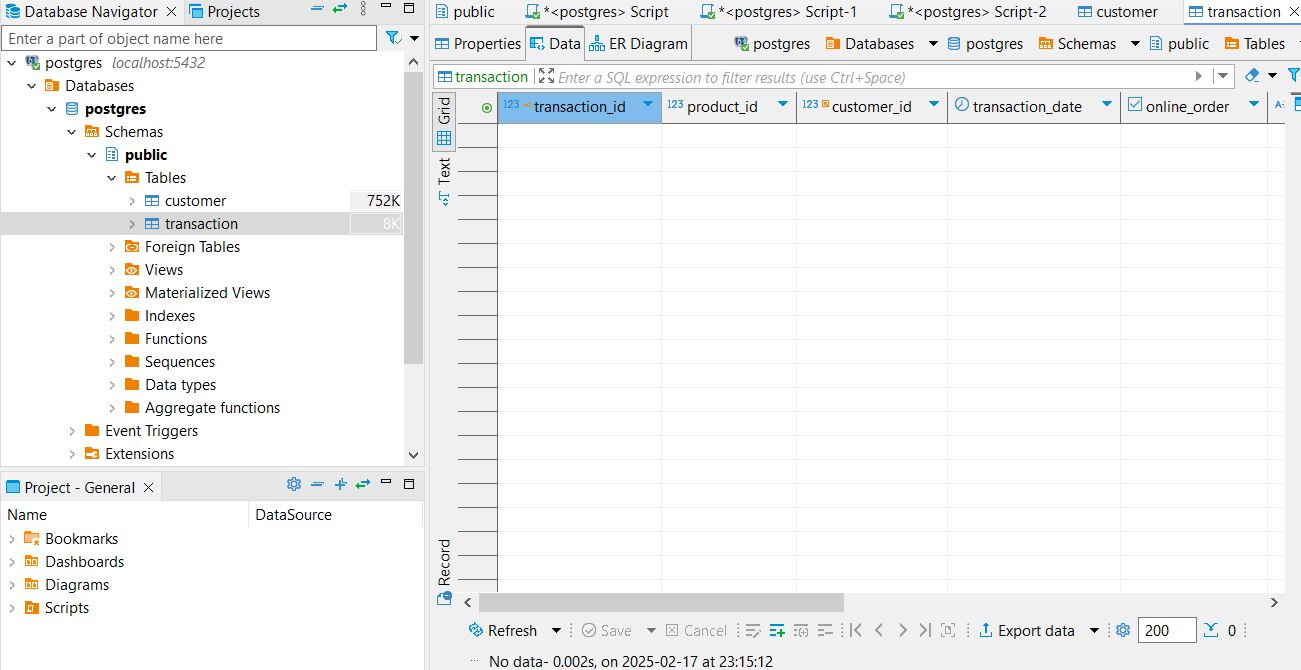

Загрузим данные через dbeawer

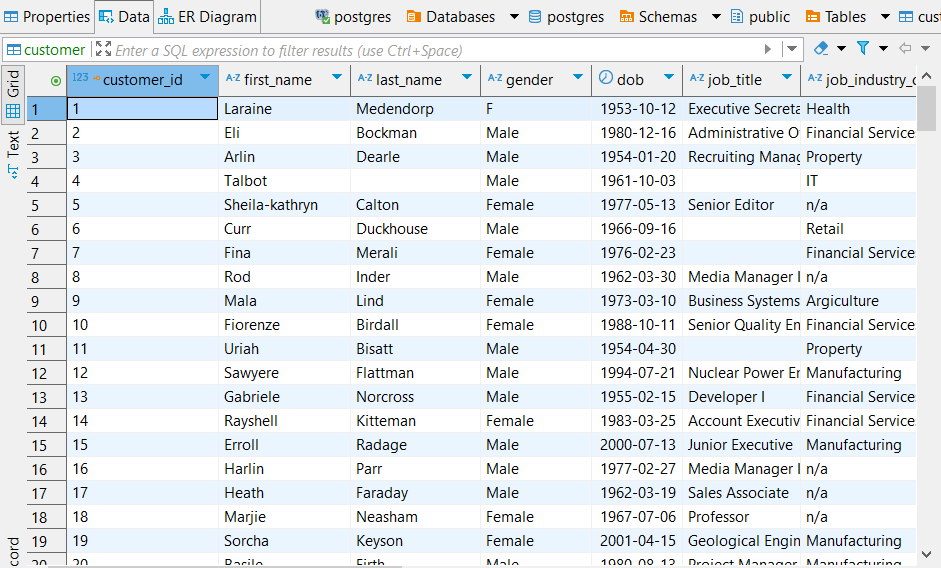

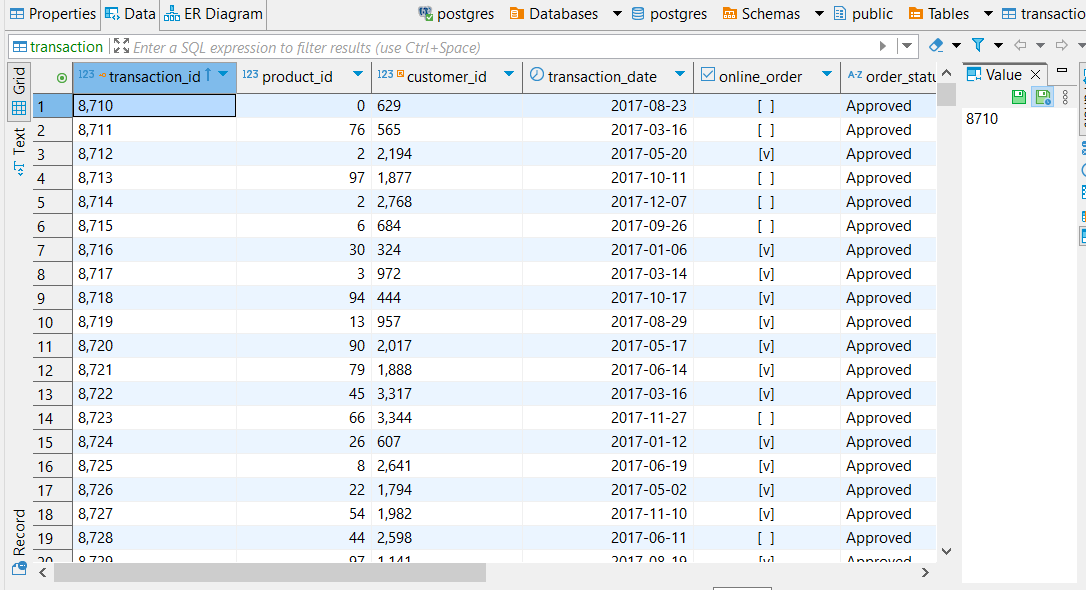



**1. Вывести все уникальные бренды, у которых стандартная стоимость выше 1500 долларов.**



```
SELECT DISTINCT brand
FROM transaction
WHERE standard_cost > 1500;
```



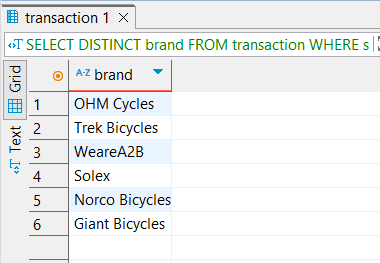

**2. Вывести все подтвержденные транзакции за период '2017-04-01' по '2017-04-09' включительно.**



```
SELECT *
FROM transaction
WHERE order_status = 'Approved'
  AND transaction_date BETWEEN '2017-04-01' AND '2017-04-09';
```



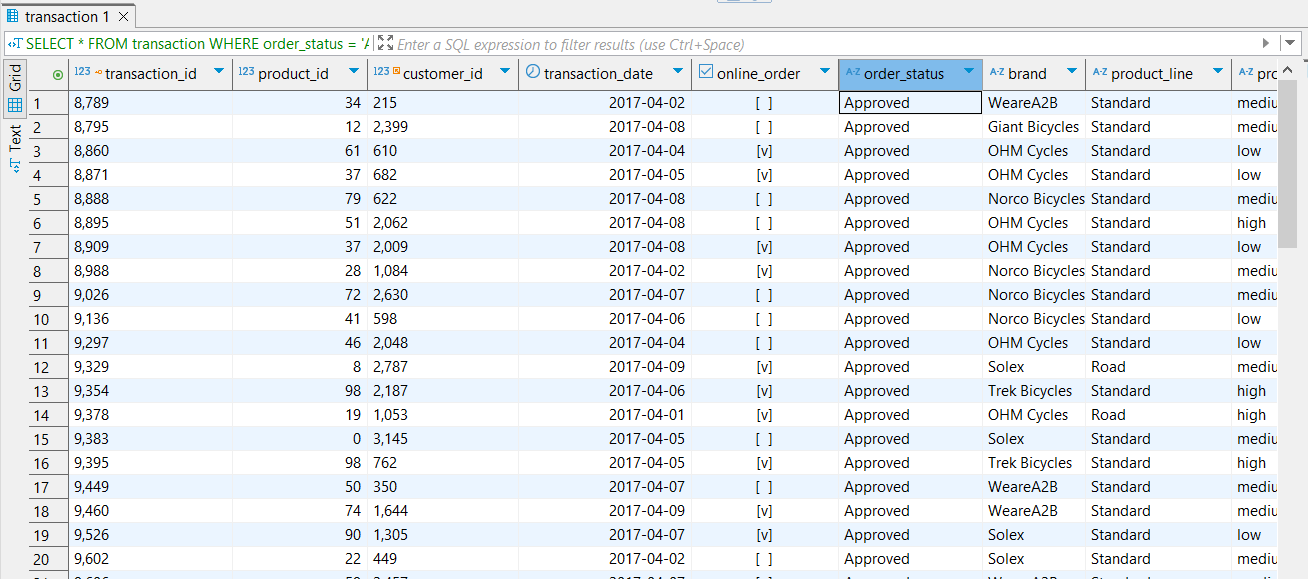

**3. Вывести все профессии у клиентов из сферы IT или Financial Services, которые начинаются с фразы 'Senior'.**



```
SELECT DISTINCT job_title
FROM customer
WHERE job_industry_category IN ('IT', 'Financial Services') -- Фильтр по сфере деятельности
  AND job_title LIKE 'Senior%'; -- Фильтр по профессиям, начинающимся с "Senior"
```



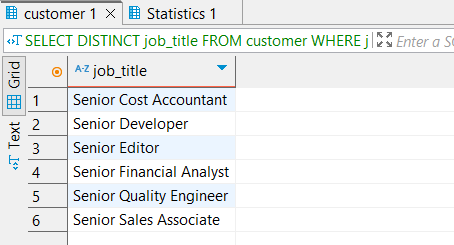

**4. Вывести все бренды, которые закупают клиенты, работающие в сфере Financial Services**



```
SELECT DISTINCT t.brand
FROM transaction t
JOIN customer c ON t.customer_id = c.customer_id
WHERE c.job_industry_category = 'Financial Services';
```



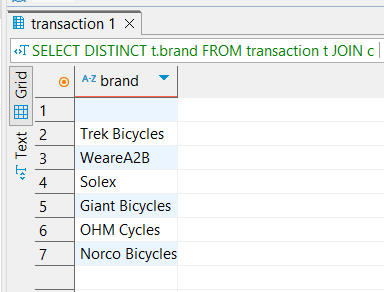

**5. Вывести 10 клиентов, которые оформили онлайн-заказ продукции из брендов 'Giant Bicycles', 'Norco Bicycles', 'Trek Bicycles'.**



```
SELECT DISTINCT c.customer_id, c.first_name, c.last_name
FROM customer c
JOIN transaction t ON c.customer_id = t.customer_id
WHERE t.brand IN ('Giant Bicycles', 'Norco Bicycles', 'Trek Bicycles')
  AND t.online_order = 'Y' -- Фильтр по онлайн-заказам
LIMIT 10;
```



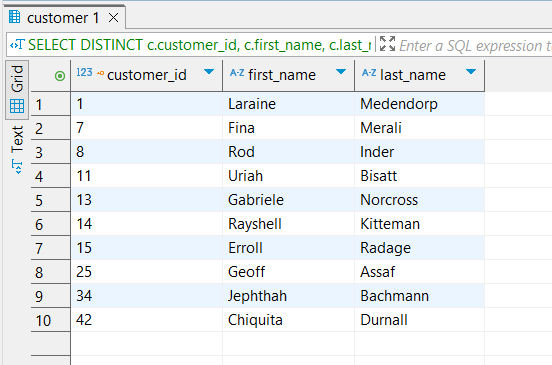

**6. Вывести всех клиентов, у которых нет транзакций.**



```
SELECT customer_id, first_name, last_name
FROM customer
WHERE customer_id NOT IN (
    SELECT DISTINCT customer_id
    FROM transaction
);
```



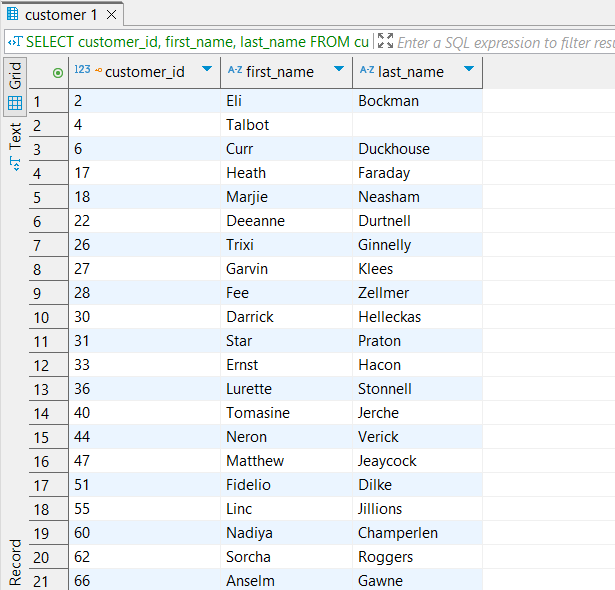

**7. Вывести всех клиентов из IT, у которых транзакции с максимальной стандартной стоимостью.**



```
SELECT c.customer_id, c.first_name, c.last_name, t.standard_cost
FROM customer c
JOIN transaction t ON c.customer_id = t.customer_id
WHERE c.job_industry_category = 'IT'
  AND t.standard_cost = (
      SELECT MAX(standard_cost)
      FROM transaction
      JOIN customer ON transaction.customer_id = customer.customer_id
      WHERE customer.job_industry_category = 'IT'
  );
```



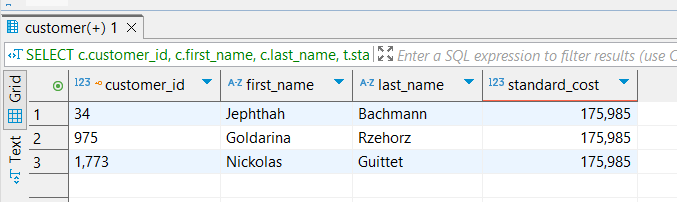

**8. Вывести всех клиентов из сферы IT и Health, у которых есть подтвержденные транзакции за период '2017-07-07' по '2017-07-17'.**



```
SELECT DISTINCT c.customer_id, c.first_name, c.last_name
FROM customer c
JOIN transaction t ON c.customer_id = t.customer_id
WHERE c.job_industry_category IN ('IT', 'Health') -- Фильтр по сферам деятельности
  AND t.order_status = 'Approved' -- Фильтр по подтвержденным транзакциям
  AND t.transaction_date BETWEEN '2017-07-07' AND '2017-07-17'; -- Фильтр по дате
```



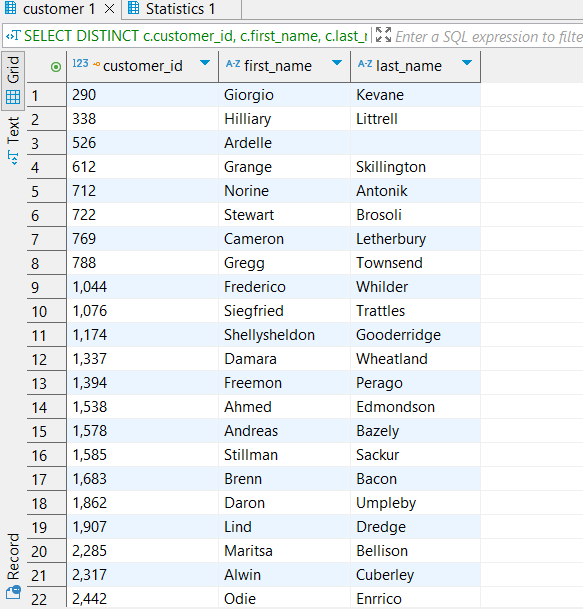